In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

3 model, cari f1 score, random state 42, training data set only

### Self note : Load dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Self note : EDA parts

In [8]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Self note : label nya true sm false, jadi kita convert ke 0 / 1

In [9]:
df['Transported'] = df['Transported'].astype(int)
df['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int32

In [10]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

ini seharusnya bivariate, hubungan antara 2 variable

<Axes: xlabel='CryoSleep', ylabel='Transported'>

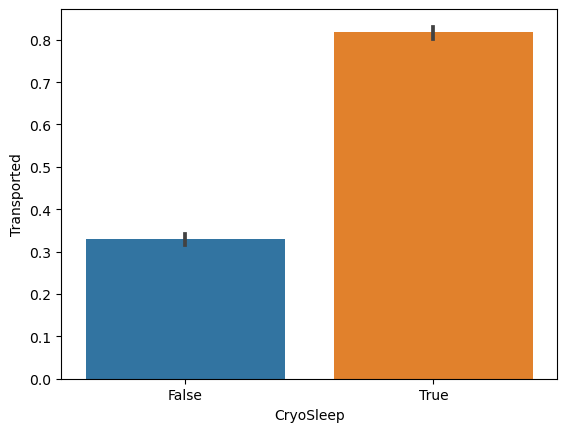

In [11]:
sns.barplot(x='CryoSleep', y='Transported', data=df)

<Axes: xlabel='HomePlanet', ylabel='Transported'>

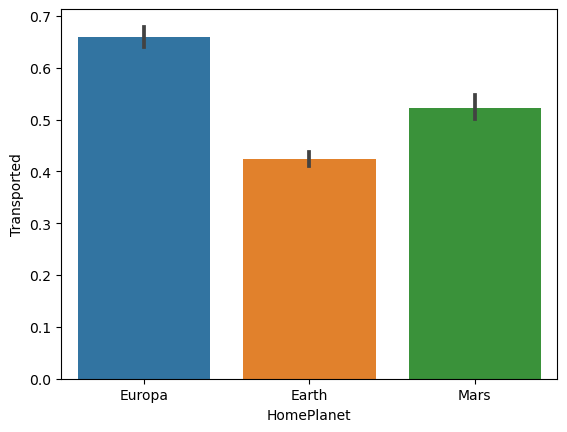

In [12]:
sns.barplot(x='HomePlanet', y='Transported', data=df)

<Axes: >

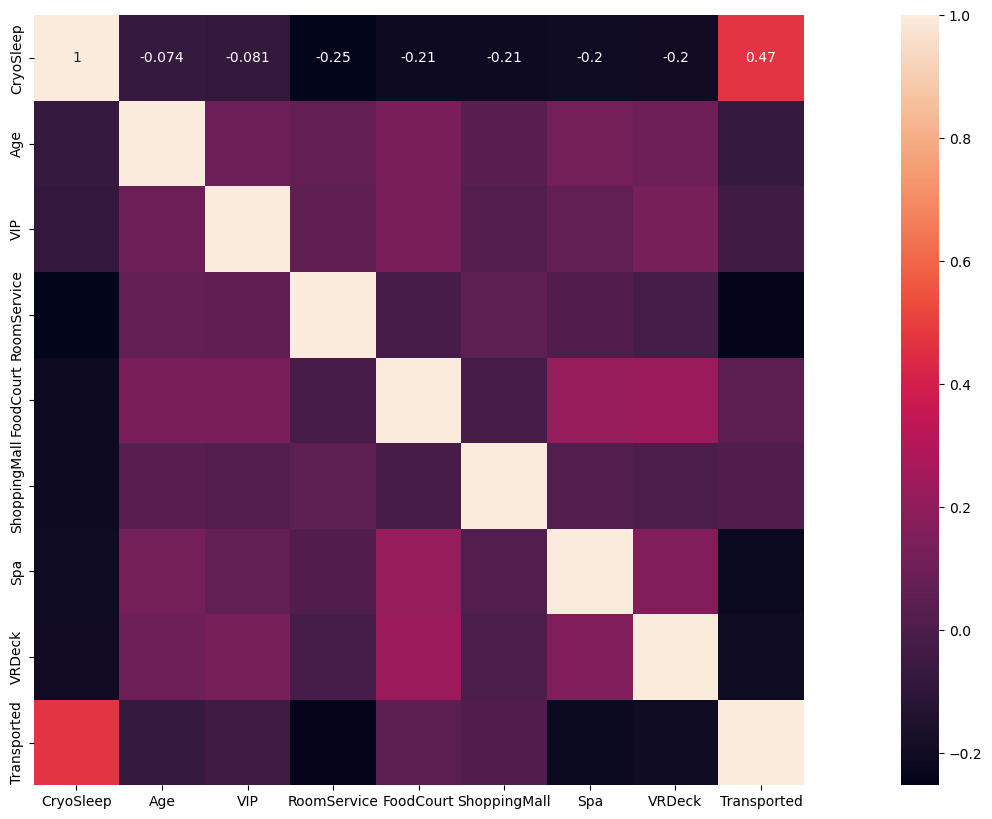

In [13]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(25,10))
temp = df.drop('PassengerId', axis=1)
temp = temp.drop('HomePlanet',axis=1)
temp = temp.drop('Cabin', axis=1)
temp = temp.drop('Destination', axis=1)
temp = temp.drop('Name', axis=1)
sns.heatmap(temp.corr(), vmax=1, square=True, annot=True)

### Data preprocessing, cleaning data

Null valuesnya kurang lebih 2 - 3% dari data, kita bisa isi aja langsung pakai fillna.

Disini gabisa langsung pasang sama rata semuanya langsung df = df.fillna(df.mean) misal karena ada data yang gabisa digituin, jadi manual satu satu, thats okay though.

In [14]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [16]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [17]:
df['HomePlanet'] = df['HomePlanet'].fillna('Earth')

In [18]:
df['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [19]:
df['HomePlanet'] = df['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':2}).astype(int)

In [20]:
df['HomePlanet'].value_counts()

HomePlanet
0    4803
1    2131
2    1759
Name: count, dtype: int64

In [21]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [22]:
df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [23]:
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].median())

In [24]:
df['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [25]:
df['CryoSleep'] = df['CryoSleep'].map({False:0, True:1}).astype(int)

In [26]:
df['CryoSleep'].value_counts()

CryoSleep
0    5656
1    3037
Name: count, dtype: int64

In [27]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

drops cabin because the value is too vague, and too many unique values.

In [28]:
df = df.drop('Cabin', axis=1)

In [29]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,0,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,1,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,1,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,0,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,0,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,0,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,1,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [30]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [31]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [32]:
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')

In [33]:
df['Destination'].value_counts()

Destination
TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [34]:
df['Destination'] = df['Destination'].map({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2}).astype(int)

In [35]:
df['Destination'].value_counts()

Destination
0    6097
1    1800
2     796
Name: count, dtype: int64

In [36]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [37]:
df['Age'].value_counts()

Age
24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: count, Length: 80, dtype: int64

untuk age, kita coba isi value random tapi rangenya yang ada di dalam min dan max normal distribution data age dalam data.

In [38]:
avg_age = df['Age'].mean()
stdev_age = df['Age'].std()
null_counter = df['Age'].isnull().sum()

# buat list of random numbers sebanyak nan
fill_null_age_with_random = np.random.randint(avg_age - stdev_age, avg_age + stdev_age, size=null_counter)
df['Age'][np.isnan(df['Age'])] = fill_null_age_with_random
df['Age'] = df['Age'].astype(int)

df['AgeRange'] = pd.cut(df['Age'], 5) # ini clusters age jadi 5 klmpk / range
df['AgeRange'].value_counts()

C:\Users\willi\AppData\Local\Temp\ipykernel_15644\1766683509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][np.isnan(df['Age'])] = fill_null_age_with_random


AgeRange
(15.8, 31.6]      4171
(31.6, 47.4]      2306
(-0.079, 15.8]    1250
(47.4, 63.2]       830
(63.2, 79.0]       136
Name: count, dtype: int64

In [39]:
df['AgeRange'].unique()

[(31.6, 47.4], (15.8, 31.6], (47.4, 63.2], (-0.079, 15.8], (63.2, 79.0]]
Categories (5, interval[float64, right]): [(-0.079, 15.8] < (15.8, 31.6] < (31.6, 47.4] < (47.4, 63.2] < (63.2, 79.0]]

akhirnya kita bisa set age jadi value yang rangenya cukup dekat, thanks to AgeRange

sebenarnya AgeRange itu cuma utk alat bantu / cara hitung yang lebih mudah aja utk text code dibawah

In [40]:
df.loc[df['Age'] <= 15.8, 'Age'] = 0
df.loc[(df['Age'] > 15.8) & (df['Age'] <= 31.6), 'Age'] = 1
df.loc[(df['Age'] > 31.6) & (df['Age'] <= 47.4), 'Age'] = 2
df.loc[(df['Age'] > 47.4) & (df['Age'] <= 63.2), 'Age'] = 3
df.loc[df['Age'] > 63.2, 'Age'] = 4

In [41]:
df['Age'].value_counts()

Age
1    4171
2    2306
0    1250
3     830
4     136
Name: count, dtype: int64

In [42]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
AgeRange          0
dtype: int64

In [43]:
df['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [44]:
df['VIP'] = df['VIP'].fillna(df['VIP'].median())

In [45]:
df['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

In [46]:
df['VIP'] = df['VIP'].map({False:0, True:1}).astype(int)

In [47]:
df['VIP'].value_counts()

VIP
0    8494
1     199
Name: count, dtype: int64

In [48]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
AgeRange          0
dtype: int64

In [49]:
df['RoomService'].value_counts()

RoomService
0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [50]:
df['RoomService'].unique()

array([   0.,  109.,   43., ..., 1569., 8586.,  745.])

In [51]:
df['RoomService'] = df['RoomService'].fillna(df['RoomService'].median())

In [52]:
df['RoomService'].value_counts()

RoomService
0.0       5758
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: count, Length: 1273, dtype: int64

In [53]:
df['RoomServiceRange'] = pd.cut(df['RoomService'], 4)
df['RoomServiceRange'].unique()

[(-14.327, 3581.75], (7163.5, 10745.25], (3581.75, 7163.5], (10745.25, 14327.0]]
Categories (4, interval[float64, right]): [(-14.327, 3581.75] < (3581.75, 7163.5] < (7163.5, 10745.25] < (10745.25, 14327.0]]

In [54]:
df.loc[df['RoomService'] <= 3581.75, 'RoomService'] = 0
df.loc[(df['RoomService'] > 3581.75) & (df['RoomService'] <= 7163.5), 'RoomService'] = 1
df.loc[(df['RoomService'] > 7163.5) & (df['RoomService'] <= 10745.25), 'RoomService'] = 2
df.loc[df['RoomService'] >= 10745.25, 'RoomService'] = 3
df['RoomService'] = df['RoomService'].astype(int)

In [55]:
df['RoomService'].unique()

array([0, 2, 1, 3])

In [56]:
df['RoomService'].value_counts()

RoomService
0    8637
1      45
2      10
3       1
Name: count, dtype: int64

itu 3 outlier yang sangat out.

In [57]:
df['RoomService'] = df['RoomService'][df['RoomService'] != 3]

In [58]:
df['RoomService'].value_counts()

RoomService
0.0    8637
1.0      45
2.0      10
Name: count, dtype: int64

In [59]:
df['RoomService'].isnull().sum()

1

In [60]:
df['RoomService'] = df['RoomService'].fillna(0)

In [61]:
df['RoomService'].value_counts()

RoomService
0.0    8638
1.0      45
2.0      10
Name: count, dtype: int64

In [62]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Name                200
Transported           0
AgeRange              0
RoomServiceRange      0
dtype: int64

In [63]:
df['FoodCourt'].value_counts()

FoodCourt
0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: count, Length: 1507, dtype: int64

In [64]:
df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median())

In [65]:
df['FoodCourt'].value_counts()

FoodCourt
0.0       5639
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: count, Length: 1507, dtype: int64

In [66]:
df['FoodCourtRange'] = pd.cut(df['FoodCourt'], 4)
df['FoodCourtRange'].unique()

[(-29.813, 7453.25], (7453.25, 14906.5], (14906.5, 22359.75], (22359.75, 29813.0]]
Categories (4, interval[float64, right]): [(-29.813, 7453.25] < (7453.25, 14906.5] < (14906.5, 22359.75] < (22359.75, 29813.0]]

In [67]:
df.loc[df['FoodCourt'] <= 7453.25, 'FoodCourt'] = 0
df.loc[(df['FoodCourt'] > 7453.25) & (df['FoodCourt'] <= 14906.5), 'FoodCourt'] = 1
df.loc[(df['FoodCourt'] > 14906.5) & (df['FoodCourt'] <= 22359.75), 'FoodCourt'] = 2
df.loc[df['FoodCourt'] >= 22359.75, 'FoodCourt'] = 3
df['FoodCourt'] = df['FoodCourt'].astype(int)

In [68]:
df['FoodCourt'].value_counts()

FoodCourt
0    8594
1      82
2      13
3       4
Name: count, dtype: int64

In [69]:
df.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall        208
Spa                 183
VRDeck              188
Name                200
Transported           0
AgeRange              0
RoomServiceRange      0
FoodCourtRange        0
dtype: int64

In [70]:
df['ShoppingMall'].value_counts()

ShoppingMall
0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1115, dtype: int64

In [71]:
df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].median())

In [72]:
df['ShoppingMall'].value_counts()

ShoppingMall
0.0       5795
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: count, Length: 1115, dtype: int64

In [73]:
df['ShoppingMallRange'] = pd.cut(df['ShoppingMall'], 4)
df['ShoppingMallRange'].unique()

[(-23.492, 5873.0], (5873.0, 11746.0], (11746.0, 17619.0], (17619.0, 23492.0]]
Categories (4, interval[float64, right]): [(-23.492, 5873.0] < (5873.0, 11746.0] < (11746.0, 17619.0] < (17619.0, 23492.0]]

In [74]:
df.loc[df['ShoppingMall'] <= 5873, 'ShoppingMall'] = 0
df.loc[(df['ShoppingMall'] > 5873) & (df['ShoppingMall'] <= 11746), 'ShoppingMall'] = 1
df.loc[(df['ShoppingMall'] > 11746) & (df['ShoppingMall'] <= 17619), 'ShoppingMall'] = 2
df.loc[df['ShoppingMall'] >= 17619, 'ShoppingMall'] = 3
df['ShoppingMall'] = df['ShoppingMall'].astype(int)

In [75]:
df['ShoppingMall'].value_counts()

ShoppingMall
0    8679
1      12
2       1
3       1
Name: count, dtype: int64

In [76]:
df.isnull().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                  183
VRDeck               188
Name                 200
Transported            0
AgeRange               0
RoomServiceRange       0
FoodCourtRange         0
ShoppingMallRange      0
dtype: int64

In [77]:
df['Spa'].value_counts()

Spa
0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: count, Length: 1327, dtype: int64

In [78]:
df['Spa'] = df['Spa'].fillna(df['Spa'].median())

In [79]:
df['Spa'].value_counts()

Spa
0.0       5507
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: count, Length: 1327, dtype: int64

In [80]:
df['SpaRange'] = pd.cut(df['Spa'], 4)
df['SpaRange'].unique()

[(-22.408, 5602.0], (5602.0, 11204.0], (11204.0, 16806.0], (16806.0, 22408.0]]
Categories (4, interval[float64, right]): [(-22.408, 5602.0] < (5602.0, 11204.0] < (11204.0, 16806.0] < (16806.0, 22408.0]]

In [81]:
df.loc[df['Spa'] <= 5602, 'Spa'] = 0
df.loc[(df['Spa'] > 5602) & (df['Spa'] <= 11204), 'Spa'] = 1
df.loc[(df['Spa'] > 11204) & (df['Spa'] <= 16806), 'Spa'] = 2
df.loc[df['Spa'] > 16806, 'Spa'] = 3
df['Spa'] = df['Spa'].astype(int)

In [82]:
df['Spa'].value_counts()

Spa
0    8619
1      58
2      14
3       2
Name: count, dtype: int64

In [83]:
df.isnull().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck               188
Name                 200
Transported            0
AgeRange               0
RoomServiceRange       0
FoodCourtRange         0
ShoppingMallRange      0
SpaRange               0
dtype: int64

In [84]:
df['VRDeck'].value_counts()

VRDeck
0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: count, Length: 1306, dtype: int64

In [85]:
df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].median())

In [86]:
df['VRDeck'].value_counts()

VRDeck
0.0       5683
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: count, Length: 1306, dtype: int64

In [87]:
df['VRDeckRange'] = pd.cut(df['VRDeck'], 4)
df['VRDeckRange'].unique()

[(-24.133, 6033.25], (6033.25, 12066.5], (12066.5, 18099.75], (18099.75, 24133.0]]
Categories (4, interval[float64, right]): [(-24.133, 6033.25] < (6033.25, 12066.5] < (12066.5, 18099.75] < (18099.75, 24133.0]]

In [88]:
df.loc[df['VRDeck'] <= 6033.25, 'VRDeck'] = 0
df.loc[(df['VRDeck'] > 6033.25) & (df['VRDeck'] <= 12066.5), 'VRDeck'] = 1
df.loc[(df['VRDeck'] > 12066.5) & (df['VRDeck'] <= 18099.75), 'VRDeck'] = 2
df.loc[df['VRDeck'] > 18099.75, 'VRDeck'] = 3
df['VRDeck'] = df['VRDeck'].astype(int)

In [89]:
df['VRDeck'].value_counts()

VRDeck
0    8617
1      63
2      11
3       2
Name: count, dtype: int64

In [90]:
df.isnull().sum()

PassengerId            0
HomePlanet             0
CryoSleep              0
Destination            0
Age                    0
VIP                    0
RoomService            0
FoodCourt              0
ShoppingMall           0
Spa                    0
VRDeck                 0
Name                 200
Transported            0
AgeRange               0
RoomServiceRange       0
FoodCourtRange         0
ShoppingMallRange      0
SpaRange               0
VRDeckRange            0
dtype: int64

Drop the features that is not relevant, such as Name, PassengerId, and features ends with Range because they are only cluster helper or whatever you call it

In [91]:
drop_these_features = ['Name', 'PassengerId', 'AgeRange', 'RoomServiceRange', 'FoodCourtRange', 'ShoppingMallRange', 'SpaRange', 'VRDeckRange']
df = df.drop(drop_these_features, axis=1)

In [92]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,0,2,0,0.0,0,0,0,0,0
1,0,0,0,1,0,0.0,0,0,0,0,1
2,1,0,0,3,1,0.0,0,0,1,0,0
3,1,0,0,2,0,0.0,0,0,0,0,0
4,0,0,0,1,0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,1,2,1,0.0,0,0,0,0,0
8689,0,1,2,1,0,0.0,0,0,0,0,0
8690,0,0,0,1,0,0.0,0,0,0,0,1
8691,1,0,1,2,0,0.0,0,0,0,0,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int32  
 1   CryoSleep     8693 non-null   int32  
 2   Destination   8693 non-null   int32  
 3   Age           8693 non-null   int32  
 4   VIP           8693 non-null   int32  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   int32  
 7   ShoppingMall  8693 non-null   int32  
 8   Spa           8693 non-null   int32  
 9   VRDeck        8693 non-null   int32  
 10  Transported   8693 non-null   int32  
dtypes: float64(1), int32(10)
memory usage: 407.6 KB


In [94]:
df['RoomService'] = df['RoomService'].astype(int)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   HomePlanet    8693 non-null   int32
 1   CryoSleep     8693 non-null   int32
 2   Destination   8693 non-null   int32
 3   Age           8693 non-null   int32
 4   VIP           8693 non-null   int32
 5   RoomService   8693 non-null   int32
 6   FoodCourt     8693 non-null   int32
 7   ShoppingMall  8693 non-null   int32
 8   Spa           8693 non-null   int32
 9   VRDeck        8693 non-null   int32
 10  Transported   8693 non-null   int32
dtypes: int32(11)
memory usage: 373.7 KB


## Feature selection

In [96]:
features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X = df[features]
y = df['Transported']

## Train Test Splitting

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [98]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
2333,0,0,0,1,0,0,0,0,0,0
2589,0,0,0,1,0,0,0,0,0,0
8302,1,1,1,1,0,0,0,0,0,0
8177,2,0,0,1,0,0,0,0,0,0
500,1,1,1,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5734,0,0,0,1,0,0,0,0,0,0
5191,2,0,0,3,0,0,0,0,0,0
5390,0,0,2,1,0,0,0,0,0,0
860,2,0,0,2,0,0,0,0,0,0


In [99]:
y_train

2333    0
2589    0
8302    1
8177    1
500     1
       ..
5734    1
5191    0
5390    0
860     0
7270    0
Name: Transported, Length: 6954, dtype: int32

In [100]:
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
304,2,0,0,1,0,0,0,0,0,0
2697,0,0,0,1,0,0,0,0,0,0
8424,0,1,0,2,0,0,0,0,0,0
1672,0,0,0,2,0,0,0,0,0,0
8458,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7175,0,1,0,1,0,0,0,0,0,0
3187,0,1,0,0,0,0,0,0,0,0
1302,0,0,0,1,0,0,0,0,0,0
5934,2,1,0,2,0,0,0,0,0,0


In [101]:
y_test

304     1
2697    0
8424    0
1672    1
8458    1
       ..
7175    0
3187    1
1302    0
5934    1
6093    0
Name: Transported, Length: 1739, dtype: int32

### Modelling, use 3, find the best

* Random Forest Classifier
* Linear Support Vector Classification (Linear SVM)
* Decision Tree Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

### Random Forest Classifier

In [107]:
rand_for = RandomForestClassifier(random_state=42)
rand_for.fit(X_train, y_train) # training model

y_pred = rand_for.predict(X_test) # ngetes model

output_rand = f1_score(y_test, y_pred) # bandingin hasil tes dan jawaban dari train
print("Random Forest Classifier - F1 Score :", output_rand)

Random Forest Classifier - F1 Score : 0.7181418706842436


### Linear SVM Classification

In [108]:
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

output_svc = f1_score(y_test, y_pred)
print("Linear SVC - F1 Score :", output_svc)

Linear SVC - F1 Score : 0.6923076923076923


### Decision Tree Classifier

In [109]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)

output_dec_tree = f1_score(y_test, y_pred)
print("Decision Tree Classifier - F1 Score :", output_dec_tree)

Decision Tree Classifier - F1 Score : 0.7177875549968573


Model terbaik adalah Random Forest Clasifier yang dikhususkan untuk klasifikasi dengan hasil 0.7181, yang dimana berbeda sangat tipis terhadap Decision Tree Classifier sebesar 0.7177, dan jauh lebih baik dibandingkan Linear SVM Classifier yang sebesar 0.6923